### Importing basic libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

### Loading the dataset

In [4]:
df=pd.read_csv("penguins_data.csv")
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [6]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


### Treating NaN values and Encoding where necessary

In [7]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [8]:
df[['studyName']].value_counts()

studyName
PAL0910      120
PAL0809      114
PAL0708      110
Name: count, dtype: int64

In [9]:
df = pd.get_dummies(df,columns=['studyName'],drop_first=True)

In [10]:
df[['Sample Number']].value_counts()  #will drop this

Sample Number
1                3
45               3
52               3
51               3
50               3
                ..
129              1
128              1
127              1
126              1
152              1
Name: count, Length: 152, dtype: int64

In [11]:
df[['Species']].value_counts()

Species                                  
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [12]:
df['Species']=df['Species'].astype('category')
df['Species']=df['Species'].cat.codes
df['Species'].value_counts()

Species
0    152
2    124
1     68
Name: count, dtype: int64

In [13]:
df[['Region']].value_counts()

Region
Anvers    344
Name: count, dtype: int64

In [14]:
df[['Island']].value_counts()

Island   
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Island'],drop_first=True)

In [16]:
df[['Stage']].value_counts()

Stage             
Adult, 1 Egg Stage    344
Name: count, dtype: int64

In [17]:
df[['Clutch Completion']].value_counts()

Clutch Completion
Yes                  308
No                    36
Name: count, dtype: int64

In [18]:
df['Clutch Completion']=df['Clutch Completion'].astype('category')
df['Clutch Completion']=df['Clutch Completion'].cat.codes
df['Clutch Completion'].value_counts()

Clutch Completion
1    308
0     36
Name: count, dtype: int64

In [19]:
df[['Date Egg']].value_counts()

Date Egg
11/27/07    18
11/16/07    16
11/9/08     16
11/18/09    14
11/4/08     12
11/6/08     12
11/13/08    12
11/21/09    12
11/27/09    10
11/14/08    10
11/22/09    10
11/29/07    10
11/15/09    10
11/17/09    10
11/16/09    10
11/28/07     8
11/3/08      8
11/24/08     8
11/8/08      8
11/9/07      8
11/12/07     8
12/1/09      8
11/25/09     6
11/13/07     6
11/2/08      6
11/20/09     6
11/23/09     6
12/3/07      6
11/30/07     4
11/9/09      4
11/26/07     4
11/10/07     4
11/25/08     4
11/15/08     4
11/10/09     4
11/11/08     4
11/13/09     4
11/15/07     4
11/21/07     4
11/17/08     4
11/19/07     4
11/18/07     2
11/22/07     2
11/14/09     2
11/7/08      2
11/12/09     2
11/19/09     2
11/11/07     2
11/10/08     2
11/5/08      2
Name: count, dtype: int64

In [20]:
df = pd.get_dummies(df,columns=['Date Egg'],drop_first=True)

In [21]:
df[['Culmen Length (mm)']].value_counts()

Culmen Length (mm)
41.1                  7
45.2                  6
37.8                  5
46.2                  5
45.5                  5
                     ..
42.3                  1
42.1                  1
41.8                  1
41.7                  1
59.6                  1
Name: count, Length: 164, dtype: int64

In [22]:
df['Culmen Length (mm)']=df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].median())

In [23]:
df[['Culmen Depth (mm)']].value_counts()

Culmen Depth (mm)
17.0                 12
15.0                 10
18.6                 10
17.9                 10
18.5                 10
                     ..
14.9                  1
13.6                  1
13.4                  1
13.3                  1
21.5                  1
Name: count, Length: 80, dtype: int64

In [24]:
df['Culmen Depth (mm)']=df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].median())

In [25]:
df[['Flipper Length (mm)']].value_counts()

Flipper Length (mm)
190.0                  22
195.0                  17
187.0                  16
193.0                  15
210.0                  14
191.0                  13
215.0                  12
197.0                  10
196.0                  10
185.0                   9
208.0                   8
216.0                   8
198.0                   8
220.0                   8
212.0                   7
192.0                   7
189.0                   7
186.0                   7
230.0                   7
184.0                   7
181.0                   7
201.0                   6
213.0                   6
214.0                   6
222.0                   6
217.0                   6
188.0                   6
199.0                   6
221.0                   5
203.0                   5
218.0                   5
180.0                   5
219.0                   5
194.0                   5
209.0                   5
202.0                   4
228.0                   4
200.0             

In [26]:
df['Flipper Length (mm)']=df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].median())

In [27]:
df['Body Mass (g)']=df['Body Mass (g)'].fillna(df['Body Mass (g)'].median())

In [28]:
df[['Body Mass (g)']].value_counts()

Body Mass (g)
3800.0           12
3700.0           11
3900.0           10
3950.0           10
3550.0            9
                 ..
4375.0            1
4475.0            1
4575.0            1
4675.0            1
6300.0            1
Name: count, Length: 94, dtype: int64

In [29]:
df[['Sex']].value_counts()

Sex   
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [30]:
df['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [31]:
df['Sex'] = df['Sex'].replace('.', 'MALE')

In [32]:
df['Sex']=df['Sex'].fillna('MALE')

In [33]:
df[['Sex']].value_counts()

Sex   
MALE      179
FEMALE    165
Name: count, dtype: int64

In [34]:
df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes
df['Sex'].value_counts()

Sex
1    179
0    165
Name: count, dtype: int64

In [35]:
df[['Delta 15 N (o/oo)']].value_counts()

Delta 15 N (o/oo)
7.63220              1
9.02657              1
9.02330              1
9.01079              1
9.00642              1
                    ..
8.41151              1
8.41017              1
8.40327              1
8.39867              1
10.02544             1
Name: count, Length: 330, dtype: int64

In [36]:
df['Delta 15 N (o/oo)'].median()
df['Delta 15 N (o/oo)']=df['Delta 15 N (o/oo)'].fillna(8.652405)

In [37]:
df['Delta 15 N (o/oo)'].isna().sum()

0

In [38]:
df[['Delta 13 C (o/oo)']].value_counts()

Delta 13 C (o/oo)
-27.01854            1
-25.23453            1
-25.29805            1
-25.29856            1
-25.32176            1
                    ..
-26.18161            1
-26.18444            1
-26.18466            1
-26.18599            1
-23.78767            1
Name: count, Length: 331, dtype: int64

In [39]:
df['Delta 13 C (o/oo)']=df['Delta 13 C (o/oo)'].fillna(df['Delta 13 C (o/oo)'].median())

In [40]:
df.isna().sum()

Sample Number       0
Species             0
Region              0
Stage               0
Individual ID       0
                   ..
Date Egg_11/9/07    0
Date Egg_11/9/08    0
Date Egg_11/9/09    0
Date Egg_12/1/09    0
Date Egg_12/3/07    0
Length: 67, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample Number        344 non-null    int64  
 1   Species              344 non-null    int8   
 2   Region               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Clutch Completion    344 non-null    int8   
 6   Culmen Length (mm)   344 non-null    float64
 7   Culmen Depth (mm)    344 non-null    float64
 8   Flipper Length (mm)  344 non-null    float64
 9   Body Mass (g)        344 non-null    float64
 10  Sex                  344 non-null    int8   
 11  Delta 15 N (o/oo)    344 non-null    float64
 12  Delta 13 C (o/oo)    344 non-null    float64
 13  Comments             26 non-null     object 
 14  studyName_PAL0809    344 non-null    bool   
 15  studyName_PAL0910    344 non-null    boo

### Dropping the insignificant columns

In [42]:
df.drop(columns=['Sample Number','Individual ID','Stage','Region','Comments'],inplace=True)

In [43]:
df.head(2)

,Species,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0809,...,Date Egg_11/4/08,Date Egg_11/5/08,Date Egg_11/6/08,Date Egg_11/7/08,Date Egg_11/8/08,Date Egg_11/9/07,Date Egg_11/9/08,Date Egg_11/9/09,Date Egg_12/1/09,Date Egg_12/3/07
0,0,1,39.1,18.7,181.0,3750.0,1,8.652405,-25.83352,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.69454,False,...,False,False,False,False,False,False,False,False,False,False


### Defining target/dependent variable (y) and features/independent variables (x)

In [44]:
df[['Species']].value_counts()

Species
0          152
2          124
1           68
Name: count, dtype: int64

In [45]:
y=df[['Species']]
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [46]:
x=df.drop(columns=['Species'])
x.head()

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0809,studyName_PAL0910,...,Date Egg_11/4/08,Date Egg_11/5/08,Date Egg_11/6/08,Date Egg_11/7/08,Date Egg_11/8/08,Date Egg_11/9/07,Date Egg_11/9/08,Date Egg_11/9/09,Date Egg_12/1/09,Date Egg_12/3/07
0,1,39.10,18.7,181.0,3750.0,1,8.652405,-25.83352,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,40.30,18.0,195.0,3250.0,0,8.368210,-25.33302,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426,False,False,...,False,False,False,False,False,False,False,False,False,False


#### converting boolean dtype into int

In [47]:
col=df.select_dtypes(include=['bool']).columns

In [48]:
df[col] = df[col].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    int8   
 1   Clutch Completion    344 non-null    int8   
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    int8   
 7   Delta 15 N (o/oo)    344 non-null    float64
 8   Delta 13 C (o/oo)    344 non-null    float64
 9   studyName_PAL0809    344 non-null    int32  
 10  studyName_PAL0910    344 non-null    int32  
 11  Island_Dream         344 non-null    int32  
 12  Island_Torgersen     344 non-null    int32  
 13  Date Egg_11/10/08    344 non-null    int32  
 14  Date Egg_11/10/09    344 non-null    int32  
 15  Date Egg_11/11/07    344 non-null    int

In [50]:
df.head(2)

,Species,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0809,...,Date Egg_11/4/08,Date Egg_11/5/08,Date Egg_11/6/08,Date Egg_11/7/08,Date Egg_11/8/08,Date Egg_11/9/07,Date Egg_11/9/08,Date Egg_11/9/09,Date Egg_12/1/09,Date Egg_12/3/07
0,0,1,39.1,18.7,181.0,3750.0,1,8.652405,-25.83352,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.69454,0,...,0,0,0,0,0,0,0,0,0,0


### Importing libraries and modules

In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

### Splitting the data into training and testing set

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

### Making the decision tree (classification)

In [53]:
dtreec=DecisionTreeClassifier()

In [54]:
dtreec.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_train_pred=dtreec.predict(x_train)
y_test_pred=dtreec.predict(x_test)

### Training and Testing Accuracy

In [56]:
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ",test_accuracy)

Train Accuracy:  1.0
Test Accuracy:  0.9534883720930233


### Classification Report

In [57]:
cls_report_train=classification_report(y_train,y_train_pred)
cls_report_test=classification_report(y_test,y_test_pred)
print("cls_report_train")
print(cls_report_train)
print( )
print("cls_report_test")
print(cls_report_test)

cls_report_train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       100

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


cls_report_test
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.95      0.95      0.95        20
           2       0.92      1.00      0.96        24

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.95      0.95      0.95        86



### Confusion Matrix

In [58]:
cm_train=confusion_matrix(y_train,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)
print("confusion_matrix train")
print(cm_train)
print( )
print("confusion_matrix test")
print(cm_test)

confusion_matrix train
[[110   0   0]
 [  0  48   0]
 [  0   0 100]]

confusion_matrix test
[[39  1  2]
 [ 1 19  0]
 [ 0  0 24]]


##### This tells that training accuracy is 100% while testing accuracy is only 95% . Model can be trained better.

### Pruning the tree to maximum depth of 3

In [59]:
dtreec=DecisionTreeClassifier(max_depth=3)

In [60]:
dtreec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
y_train_pred=dtreec.predict(x_train)
y_test_pred=dtreec.predict(x_test)

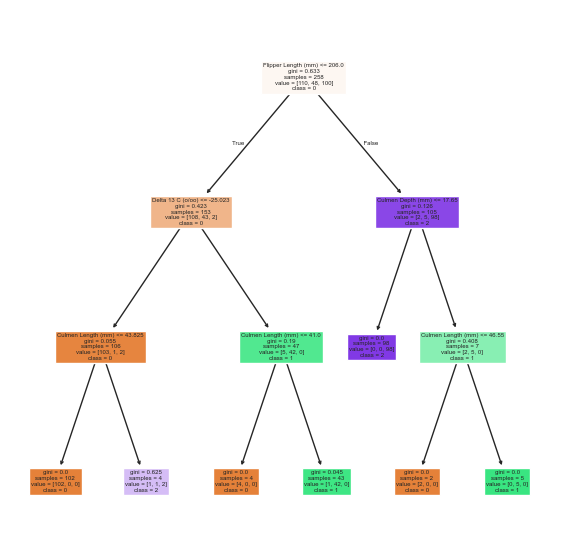

In [62]:
plt.figure(figsize=(7,7))
plot_tree(dtreec,filled=True,feature_names=x_train.columns,class_names=[str(cls) for cls in dtreec.classes_])
plt.show()

In [63]:
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ",test_accuracy)

Train Accuracy:  0.9883720930232558
Test Accuracy:  0.9534883720930233


#### Here, the training accuracy is 98.8% and testing accuracy is 95.3%. There is neithe biasness nor the variance.
#### Hence, this model can be accepted.

### Taking the max depth as 2

In [64]:
dtreec=DecisionTreeClassifier(max_depth=2)

In [65]:
dtreec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [66]:
y_train_pred=dtreec.predict(x_train)
y_test_pred=dtreec.predict(x_test)

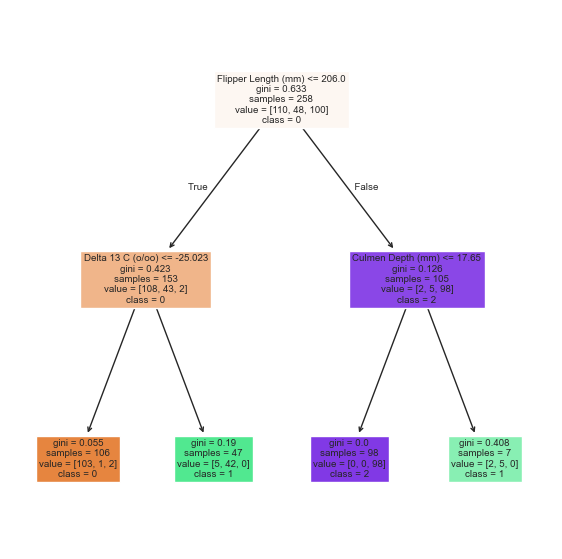

In [67]:
plt.figure(figsize=(7,7))
plot_tree(dtreec,filled=True,feature_names=x_train.columns,class_names=[str(cls) for cls in dtreec.classes_])
plt.show()

In [68]:
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ",test_accuracy)

Train Accuracy:  0.9612403100775194
Test Accuracy:  0.9418604651162791


#### When the max depth is chaned to 2, the traing accuracy becomes 96.1% and testing becomes 94.1% which is also acceptable


## 📊 Exploratory Data Analysis (EDA)

Let's visualize the dataset to better understand the distribution of penguin species and relationships between features.


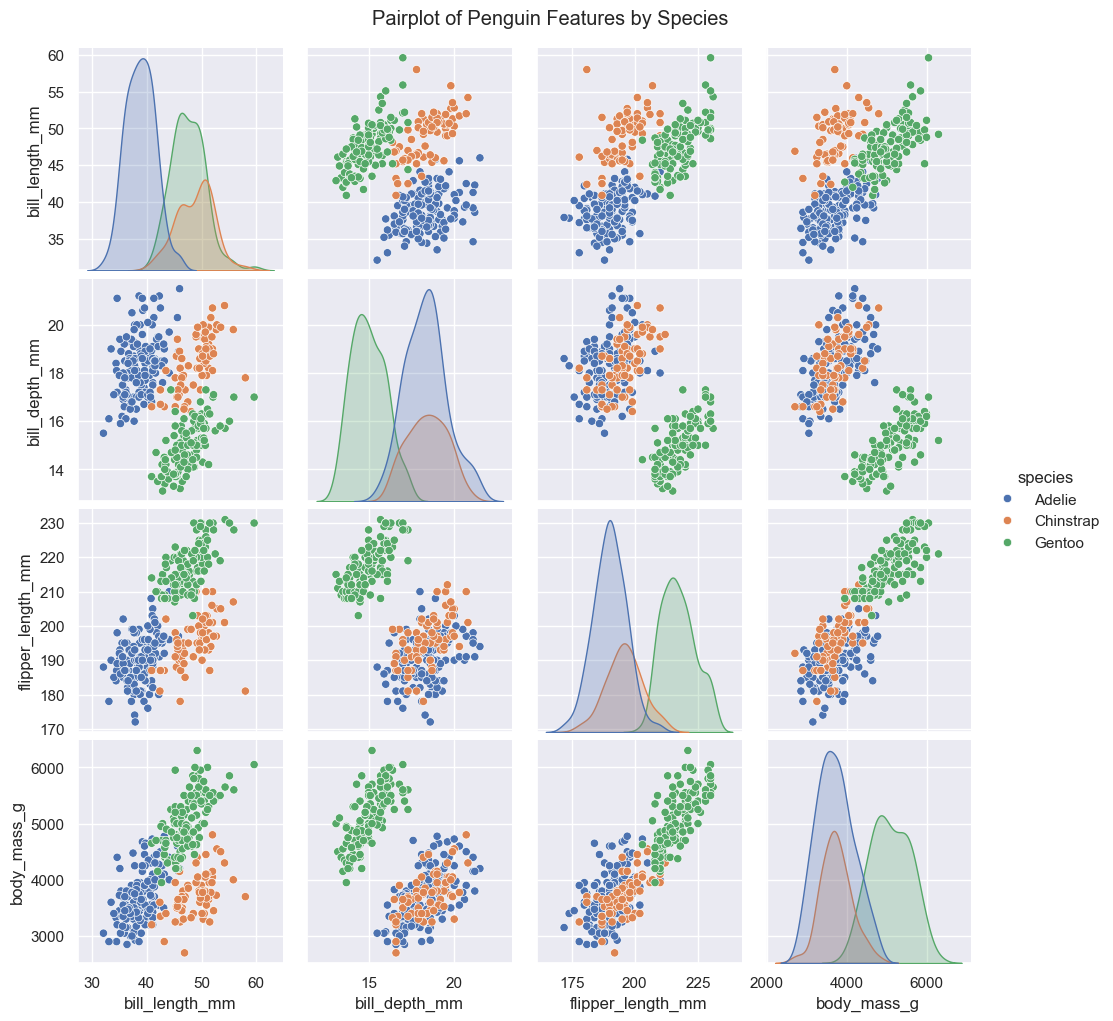

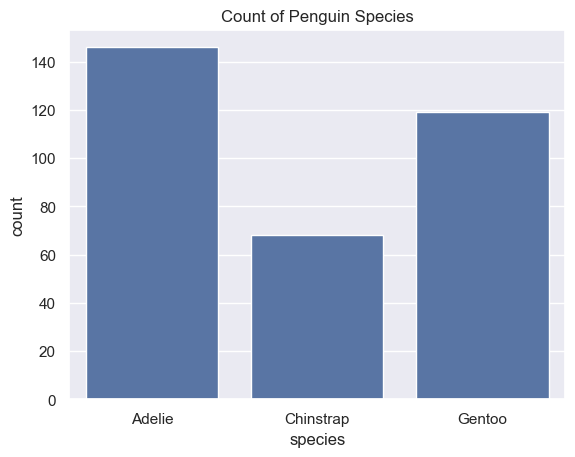

In [69]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

# Pairplot
sns.pairplot(penguins, hue="species")
plt.suptitle("Pairplot of Penguin Features by Species", y=1.02)
plt.show()

# Countplot for species
sns.countplot(x="species", data=penguins)
plt.title("Count of Penguin Species")
plt.show()
